## Actividad 2.1 paso del 1 al 5
**Regresión lineal simple**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('Francia_limpio.csv')
df.head()

,Unnamed: 0,name,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_neighbourhood,host_identity_verified,...,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_entire_homes.1,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,"Duplex avec vue, centre ville",Isabelle,2010-10-24,"Lyon, France",I'm 47 years old. I enjoy books and arts. I'm ...,within a few hours,f,5th Arrondissement,t,...,0.0,4.70,4.71,4.78,4.86,1.0,1.0,1.0,0.0,0.33
1,1,Nice Flat in the center of Lyon,Clementine,2011-02-26,"Lyon, France",Je travaille dans le cinéma et je voyage beauc...,within an hour,f,5th Arrondissement,t,...,1.0,4.75,4.80,4.96,4.88,1.0,1.0,1.0,0.0,0.15
2,2,"Centre of old town,home sweet home",Polali,2011-06-03,"Lyon, France","J'ai 34 ans , je suis animatrice auprès de per...",a few days or more,f,5th Arrondissement,t,...,0.0,4.48,4.27,4.72,4.86,1.0,1.0,1.0,0.0,0.82
3,3,"Bel apartment, 2 rooms, Lyon center",Sandrine,2011-06-06,"Lyon, France","We are a family with 3 daughters, aged 16-14-1...",within an hour,f,1st Arrondissement,t,...,0.0,4.78,4.89,4.89,4.95,1.0,1.0,1.0,0.0,0.12
4,4,Quartier Terreaux 4/6 pers. Hyper centre / Clim,Giuseppina,2011-07-18,"Rhône-Alpes, France","Mon pays d'origine est l'Italie, mais je résid...",within an hour,f,1st Arrondissement,t,...,2.0,4.62,4.86,4.83,4.88,2.0,1.0,1.0,0.0,2.99


In [69]:
df.groupby(['room_type']).count()

,Unnamed: 0,name,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_neighbourhood,host_identity_verified,...,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_entire_homes.1,calculated_host_listings_count_shared_rooms,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,7789,7789,7789,7789,7789,7789,7789,7789,7789,7789,...,7789,7789,7789,7789,7789,7789,7789,7789,7789,7789
Hotel room,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Private room,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034,...,2034,2034,2034,2034,2034,2034,2034,2034,2034,2034
Shared room,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52


## DataFrame de Entire home/apt

In [70]:
df1 = df[(df['room_type']=='Entire home/apt')]
df1

,Unnamed: 0,name,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_neighbourhood,host_identity_verified,...,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_entire_homes.1,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,"Duplex avec vue, centre ville",Isabelle,2010-10-24,"Lyon, France",I'm 47 years old. I enjoy books and arts. I'm ...,within a few hours,f,5th Arrondissement,t,...,0.0,4.70,4.71,4.78,4.86,1.0,1.0,1.0,0.0,0.33
1,1,Nice Flat in the center of Lyon,Clementine,2011-02-26,"Lyon, France",Je travaille dans le cinéma et je voyage beauc...,within an hour,f,5th Arrondissement,t,...,1.0,4.75,4.80,4.96,4.88,1.0,1.0,1.0,0.0,0.15
2,2,"Centre of old town,home sweet home",Polali,2011-06-03,"Lyon, France","J'ai 34 ans , je suis animatrice auprès de per...",a few days or more,f,5th Arrondissement,t,...,0.0,4.48,4.27,4.72,4.86,1.0,1.0,1.0,0.0,0.82
3,3,"Bel apartment, 2 rooms, Lyon center",Sandrine,2011-06-06,"Lyon, France","We are a family with 3 daughters, aged 16-14-1...",within an hour,f,1st Arrondissement,t,...,0.0,4.78,4.89,4.89,4.95,1.0,1.0,1.0,0.0,0.12
4,4,Quartier Terreaux 4/6 pers. Hyper centre / Clim,Giuseppina,2011-07-18,"Rhône-Alpes, France","Mon pays d'origine est l'Italie, mais je résid...",within an hour,f,1st Arrondissement,t,...,2.0,4.62,4.86,4.83,4.88,2.0,1.0,1.0,0.0,2.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,9886,Suite Rumba,Pablo,2024-09-12,"Lyon, France",Desconocido,within an hour,f,Desconocido,t,...,0.0,4.80,4.80,4.90,4.90,1.2,1.0,1.0,0.0,0.60
9887,9887,Suite Zelie,Pablo,2024-09-12,"Lyon, France",Desconocido,within an hour,f,Desconocido,t,...,0.0,4.80,4.80,4.90,4.90,1.2,1.0,1.0,0.0,0.60
9888,9888,Havre de Paix au Cœur du 7ème,Adrian,2024-12-12,"Lyon, France",Desconocido,within an hour,f,Desconocido,t,...,0.0,4.80,4.80,4.90,4.90,1.0,1.0,1.0,0.0,0.60
9889,9889,Le Duplex avec Rooftop,Hugues,2014-02-22,"Lyon, France",Desconocido,within an hour,f,Desconocido,t,...,0.0,4.80,4.80,4.90,4.90,1.0,1.0,1.0,0.0,0.60


In [71]:
#Eliminamos columnas tipo string
df1 = df1.select_dtypes(include=['float64','int64','float','int'])
df1

,Unnamed: 0,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_entire_homes.1,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,1.0,1.00,1.0,3.0,45.763140,4.829760,5.0,1.0,3.0,...,0.0,4.70,4.71,4.78,4.86,1.0,1.0,1.0,0.0,0.33
1,1,1.0,1.00,1.0,1.0,45.768420,4.827450,4.0,1.0,1.0,...,1.0,4.75,4.80,4.96,4.88,1.0,1.0,1.0,0.0,0.15
2,2,1.0,1.00,1.0,2.0,45.759300,4.825480,2.0,1.0,1.0,...,0.0,4.48,4.27,4.72,4.86,1.0,1.0,1.0,0.0,0.82
3,3,1.0,1.00,1.0,1.0,45.768845,4.854162,2.0,1.0,1.0,...,0.0,4.78,4.89,4.89,4.95,1.0,1.0,1.0,0.0,0.12
4,4,1.0,0.98,1.3,5.0,45.766950,4.832410,6.0,1.0,3.0,...,2.0,4.62,4.86,4.83,4.88,2.0,1.0,1.0,0.0,2.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,9886,1.0,1.00,1.3,1.7,45.747560,4.849059,5.0,1.0,2.0,...,0.0,4.80,4.80,4.90,4.90,1.2,1.0,1.0,0.0,0.60
9887,9887,1.0,1.00,1.3,1.7,45.757020,4.844830,6.0,1.0,2.0,...,0.0,4.80,4.80,4.90,4.90,1.2,1.0,1.0,0.0,0.60
9888,9888,1.0,1.00,1.0,1.0,45.737954,4.840085,2.0,1.0,1.0,...,0.0,4.80,4.80,4.90,4.90,1.0,1.0,1.0,0.0,0.60
9889,9889,1.0,1.00,1.0,2.0,45.744800,4.831920,4.0,1.0,2.0,...,0.0,4.80,4.80,4.90,4.90,1.0,1.0,1.0,0.0,0.60


**Primeras variables: “host_acceptance_rate vs host_response_rate”**

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

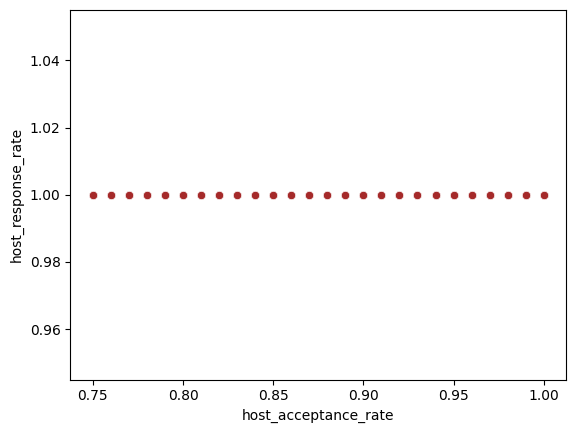

In [72]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='host_response_rate',color='brown',data=df1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vari_Dep1 = df1['host_acceptance_rate']
Vari_Indep1 = df1 [['host_response_rate']]

In [74]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [75]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vari_Indep1,y=Vari_Dep1)

LinearRegression()

In [76]:
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(0.9795197654433323)}

**Modelo matemático y = 0x (coef) + 0.9795197654433323 (intercept)**

In [ ]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Vari_Indep1, y = Vari_Dep1)
coef_Deter

0.0

In [ ]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

**Segundas variables: “host_acceptance_rate vs price”**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

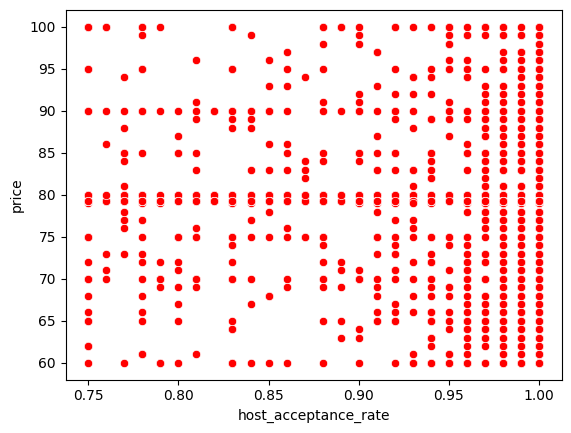

In [79]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='price',color='red',data=df1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vari_Dep2 = df1['host_acceptance_rate']
Vari_Indep2 = df1 [['price']]

In [115]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [116]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vari_Indep2,y=Vari_Dep2)

#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.000151]),
 'rank_': 1,
 'singular_': array([578.81218601]),
 'intercept_': np.float64(0.9675431468033204)}

**Modelo matemático y = 0.00x (coef) + 0.9675431468033204 (intercept)**

In [118]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Vari_Indep2, y = Vari_Dep2)
print(f'Coeficiente de determinación:',coef_Deter)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.0002988060423135819
Coeficiente de correlación: 0.017286007124653797


**Terceras variables: “host_acceptance_rate vs number_of_reviews ”**

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

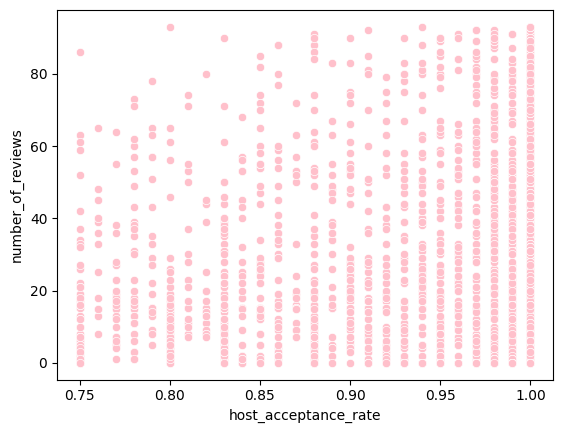

In [83]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='number_of_reviews',color='pink',data=df1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vari_Dep3 = df1['host_acceptance_rate']
Vari_Indep3 = df1 [['number_of_reviews']]

In [121]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vari_Indep3,y=Vari_Dep3)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

LinearRegression()

**Modelo matemático y = 0.00x (coef) + 0.9856442320163566 (intercept)**

In [124]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Vari_Indep3, y = Vari_Dep3)
print(f'Coeficiente de determinación:',coef_Deter)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.024338398494175184
Coeficiente de correlación: 0.1560076872919254


**Quartas variables: “review_scores_location vs review_scores_cleanliness”**

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

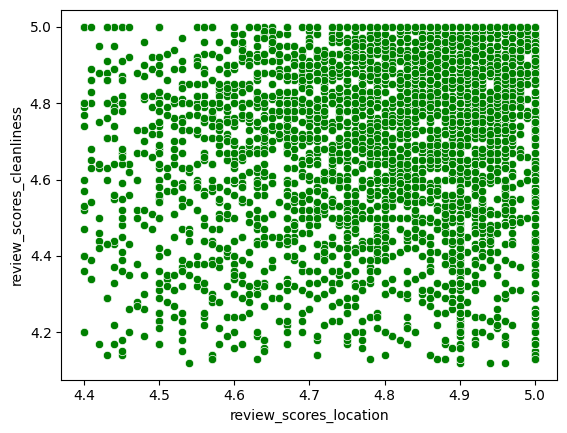

In [88]:
from turtle import color
sns.scatterplot (x='review_scores_location',y='review_scores_cleanliness',color='green',data=df1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vari_Dep4 = df1['review_scores_location']
Vari_Indep4 = df1 [['review_scores_cleanliness']]

In [90]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [126]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vari_Indep4,y=Vari_Dep4)

LinearRegression()

In [127]:
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.20116902]),
 'rank_': 1,
 'singular_': array([19.60333143]),
 'intercept_': np.float64(3.893782798950524)}

**Modelo matemático y = 0.20x (coef) + 3.893782798950524 (intercept)**

In [128]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Vari_Indep4, y = Vari_Dep4)
print(f'Coeficiente de determinación:',coef_Deter)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.07719534196262912
Coeficiente de correlación: 0.27784049734088284


**Quintas variables: “availability_365 vs number_of_reviews”**

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

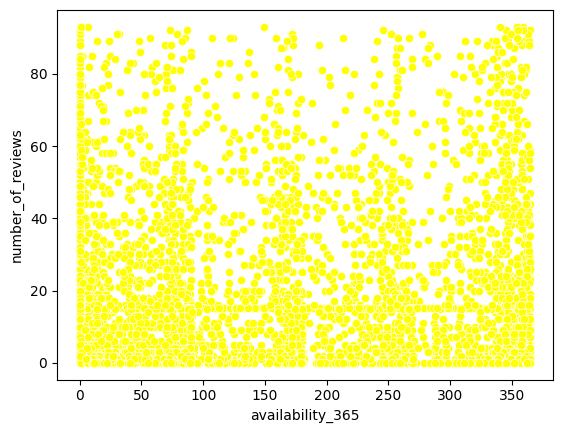

In [93]:
from turtle import color
sns.scatterplot (x='availability_365',y='number_of_reviews',color='yellow',data=df1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vari_Dep5 = df1['availability_365']
Vari_Indep5 = df1 [['number_of_reviews']]

In [95]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vari_Indep5,y=Vari_Dep5)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

LinearRegression()

**Modelo matemático y = 1.11x (coef) + 93.9480954643518 (intercept)**

In [131]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Vari_Indep5, y = Vari_Dep5)
print(f'Coeficiente de determinación:',coef_Deter)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.027105211559431797
Coeficiente de correlación: 0.16463660455509824


**Sextas variables: “reviews_per_month vs review_scores_communication”**

<Axes: xlabel='reviews_per_month', ylabel='review_scores_location'>

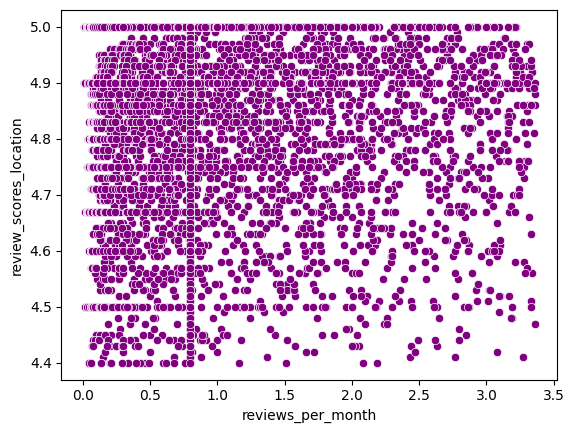

In [98]:
#No tengo el de comunication entnces lo cambié por locatio
from turtle import color
sns.scatterplot (x='reviews_per_month',y='review_scores_location',color='purple',data=df1)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vari_Dep6 = df1['reviews_per_month']
Vari_Indep6 = df1 [['review_scores_location']]

In [100]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vari_Indep6,y=Vari_Dep6)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

LinearRegression()

**Modelo matemático y = -0.77x (coef) + 4.550967072397069 (intercept)**

In [134]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Vari_Indep6, y = Vari_Dep6)
print(f'Coeficiente de determinación:',coef_Deter)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.022001511455381095
Coeficiente de correlación: 0.14832906476945473


**Modelo matemático con la mayor correlación del df1**

In [ ]:
#Correlacionar datos
corr_factors = df1.corr()
#Sacar absolutos
corr_factors = abs(corr_factors)
corr_factors

<Axes: >

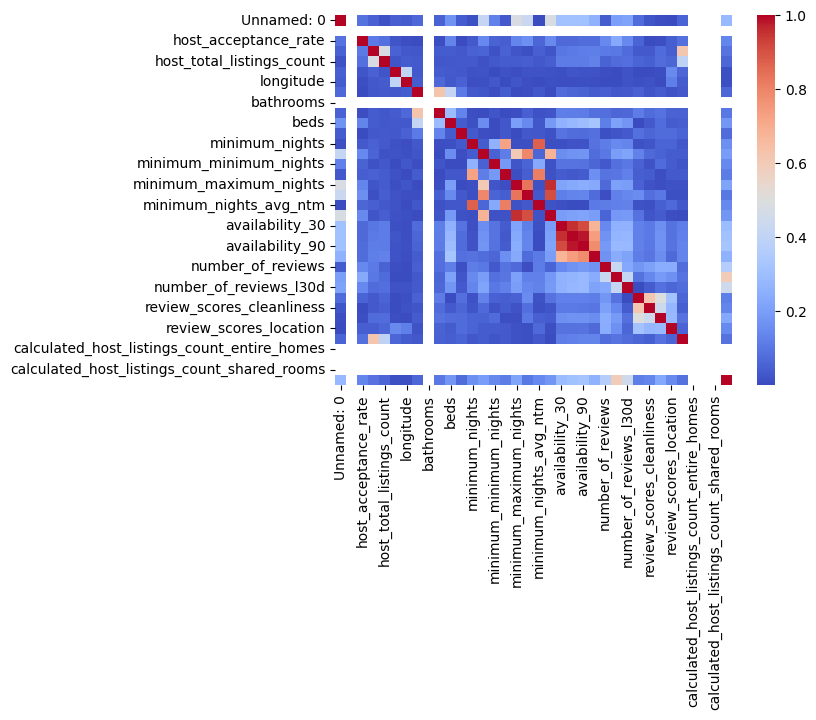

In [105]:
heat_map =sns.heatmap(corr_factors, cmap = 'coolwarm')
heat_map

<Axes: >

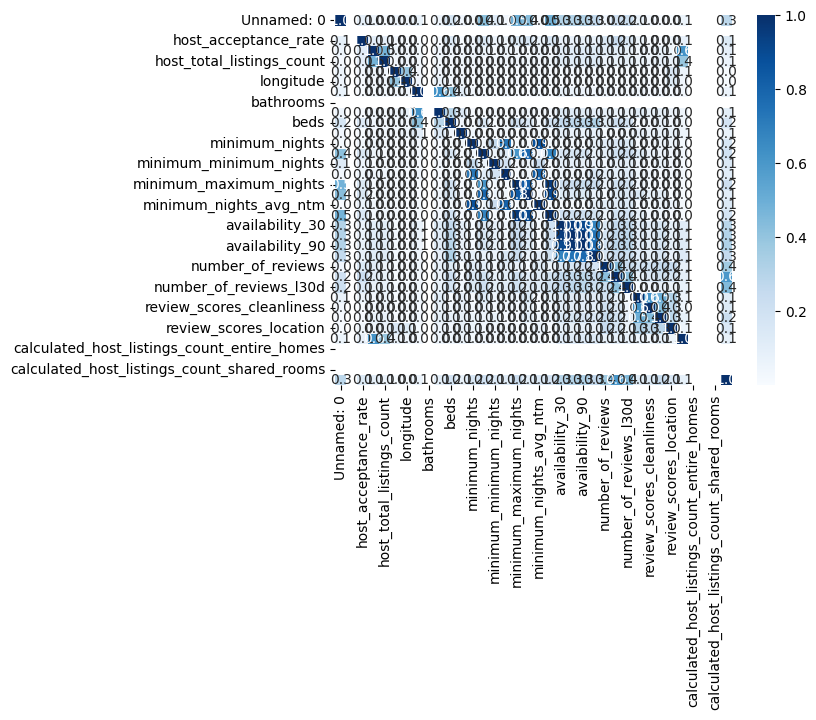

In [106]:
heat_map =sns.heatmap(corr_factors, cmap = 'Blues',annot=True,fmt='.1f')
heat_map

In [107]:
#Comprobar que la variable que yo pienso si es la más alta
cor_matrix = df1.corr()
cor_matrix['availability_365'].sort_values(ascending=False)

availability_365                                 1.000000
availability_90                                  0.780502
availability_60                                  0.741952
availability_30                                  0.677677
beds                                             0.321445
Unnamed: 0                                       0.260295
reviews_per_month                                0.257102
number_of_reviews_ltm                            0.239550
number_of_reviews_l30d                           0.211258
number_of_reviews                                0.171098
maximum_minimum_nights                           0.159026
calculated_host_listings_count                   0.131123
host_total_listings_count                        0.125909
host_listings_count                              0.120628
minimum_nights_avg_ntm                           0.108826
minimum_nights                                   0.089344
latitude                                         0.017278
longitude     

In [108]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vari_Dep = df['availability_365']
Vari_Indep = df [['availability_90']]

In [109]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [110]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vari_Indep,y=Vari_Dep)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_90'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.95526481]),
 'rank_': 1,
 'singular_': array([3542.46080193]),
 'intercept_': np.float64(17.280196265104067)}

**Modelo matemático TODO df1 y = 2.957x (coef) + 17.280196265104067 (intercept)**

## DataFrame de Hotel room

In [ ]:
df2 = df[(df['room_type']=='Hotel room')]
df2

In [ ]:
#Eliminamos columnas tipo string
df2 = df2.select_dtypes(include=['float64','int64','float','int'])
df2

In [ ]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='host_response_rate',color='brown',data=df2)

**Primeras variables: “host_acceptance_rate vs host_response_rate”**

In [139]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep1 = df2['host_acceptance_rate']
Var_Indep1 = df2 [['host_response_rate']]

In [140]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [141]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep1,y=Var_Dep1)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(0.948125)}

**Modelo matemático y = 0x (coef) + 0.948125 (intercept)**

In [142]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Dete = model.score (X = Var_Indep1, y = Var_Dep1)
print(f'Coeficiente de determinación:',coef_Dete)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Corre = np.sqrt(coef_Dete)
print(f'Coeficiente de correlación:',coef_Corre)

Coeficiente de determinación: 0.0
Coeficiente de correlación: 0.0


**Segundas variables: “host_acceptance_rate vs price”**

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

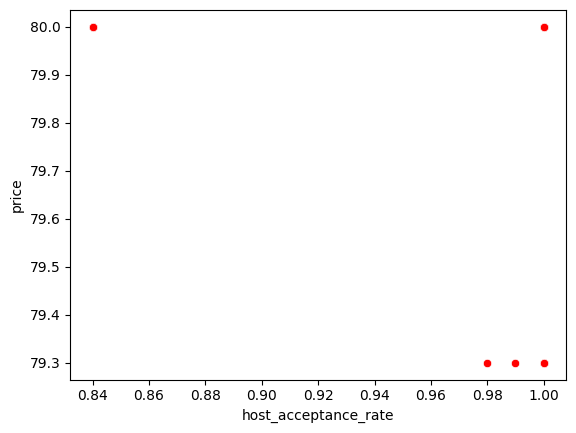

In [143]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='price',color='red',data=df2)

In [144]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep2 = df2['host_acceptance_rate']
Var_Indep2 = df2 [['price']]

In [145]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [146]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep2,y=Var_Dep2)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.10714286]),
 'rank_': 1,
 'singular_': array([1.35554417]),
 'intercept_': np.float64(9.49142857142854)}

**Modelo matemático y = -0.10x (coef) + 9.49142857142854 (intercept)**

In [147]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Dete = model.score (X = Var_Indep2, y = Var_Dep2)
print(f'Coeficiente de determinación:',coef_Dete)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Corre = np.sqrt(coef_Dete)
print(f'Coeficiente de correlación:',coef_Corre)

Coeficiente de determinación: 0.24687294272547733
Coeficiente de correlación: 0.49686310260018035


**Terceras variables: “host_acceptance_rate vs number_of_reviews ”**

In [ ]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='number_of_reviews',color='pink',data=df2)

In [149]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep3 = df2['host_acceptance_rate']
Var_Indep3 = df2 [['number_of_reviews']]

In [150]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [151]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep3,y=Var_Dep3)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.005383]),
 'rank_': 1,
 'singular_': array([24.89854413]),
 'intercept_': np.float64(0.9231613267466479)}

**Modelo matemático y = 0.005x (coef) + 0.9231613267466479 (intercept)**

In [152]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coe_Deter = model.score (X = Var_Indep3, y = Var_Dep3)
print(f'Coeficiente de determinación:',coe_Deter)
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coe_Correl = np.sqrt(coe_Deter)
print(f'Coeficiente de correlación:',coe_Correl)

Coeficiente de determinación: 0.21024067428063276
Coeficiente de correlación: 0.4585200914688829


**Quartas variables: “review_scores_location vs review_scores_cleanliness”**

In [ ]:
from turtle import color
sns.scatterplot (x='review_scores_location',y='review_scores_cleanliness',color='green',data=df2)

In [154]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep4 = df2['review_scores_location']
Var_Indep4 = df2 [['review_scores_cleanliness']]

In [155]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [156]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep4,y=Var_Dep4)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.18696577]),
 'rank_': 1,
 'singular_': array([0.40919891]),
 'intercept_': np.float64(5.720210145198017)}

**Modelo matemático y = -0.186x (coef) + 5.720210145198017 (intercept)**

In [158]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Var_Indep4, y = Var_Dep4)
print(f'Coeficiente de determinación:',coef_Deter)
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.012084799695296633
Coeficiente de correlación: 0.10993088599341239


**Quintas variables: “availability_365 vs number_of_reviews”**

In [ ]:
from turtle import color
sns.scatterplot (x='availability_365',y='number_of_reviews',color='yellow',data=df2)

In [160]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep5 = df2['availability_365']
Var_Indep5 = df2 [['number_of_reviews']]

In [161]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [162]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep5,y=Var_Dep5)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-9.66486541]),
 'rank_': 1,
 'singular_': array([24.89854413]),
 'intercept_': np.float64(279.50831333803814)}

**Modelo matemático y = -9.66x (coef) + 279.50831333803814 (intercept)**

In [163]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Var_Indep5, y = Var_Dep5)
print(f'Coeficiente de determinación:',coef_Deter)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.2009391141495971
Coeficiente de correlación: 0.44826232738163163


**Sextas variables: “reviews_per_month vs review_scores_communication”**

In [ ]:
#No tengo el de comunication entnces lo cambié por locatio
from turtle import color
sns.scatterplot (x='reviews_per_month',y='review_scores_location',color='purple',data=df2)

In [165]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep6 = df2['reviews_per_month']
Var_Indep6 = df2 [['review_scores_location']]

In [166]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [167]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep6,y=Var_Dep6)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.2158978]),
 'rank_': 1,
 'singular_': array([0.69594809]),
 'intercept_': np.float64(-0.650677075940385)}

**Modelo matemático y = 0.21x (coef) + -0.650677075940385 (intercept)**

In [168]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Var_Indep6, y = Var_Dep6)
print(f'Coeficiente de determinación:',coef_Deter)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.01931412761759288
Coeficiente de correlación: 0.13897527700131732


**Modelo matemático con la mayor correlación del df2**

In [ ]:
#Correlacionar datos
corr_factors = df2.corr()
#Sacar absolutos
corr_factors = abs(corr_factors)
corr_factors

<Axes: >

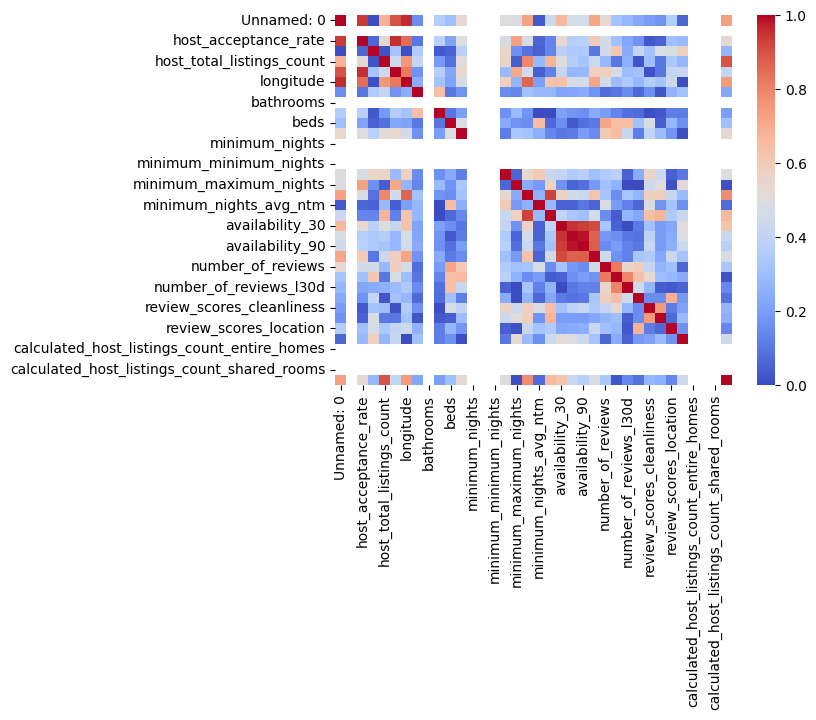

In [170]:
heat_map =sns.heatmap(corr_factors, cmap = 'coolwarm')
heat_map

In [ ]:
heat_map =sns.heatmap(corr_factors, cmap = 'Blues',annot=True,fmt='.1f')
heat_map

In [ ]:
#Comprobar que la variable que yo pienso si es la más alta
cor_matrix = df2.corr()
cor_matrix['host_acceptance_rate'].sort_values(ascending=False)

In [175]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vari_Dep = df2['host_acceptance_rate']
Vari_Indep = df2 [['longitude']]

In [176]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [177]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vari_Indep,y=Vari_Dep)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['longitude'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([3.51844988]),
 'rank_': 1,
 'singular_': array([0.07065904]),
 'intercept_': np.float64(-16.057242545646897)}

**Modelo matemático TODO df2 y = 3.51844988x (coef) + -16.057242545646897 (intercept)**

## DataFrame de Private room

In [178]:
df3 = df[(df['room_type']=='Private room')]
df3

,Unnamed: 0,name,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_neighbourhood,host_identity_verified,...,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_entire_homes.1,calculated_host_listings_count_shared_rooms,reviews_per_month
8,8,Le Duplex - Spacious triple room.,Romain,2011-09-28,"Lyon, France","Voyageur dans l’âme, j’ai été parmi les premie...",within a few hours,f,3rd Arrondissement,t,...,0.0,4.67,4.53,4.76,4.52,1.0,1.0,1.0,0.0,0.68
16,16,Belle chambre libre dans un T3,Fadel,2012-07-13,"Lyon, France","Homme de 29 ans, sérieux et agréable",within an hour,f,1st Arrondissement,f,...,0.0,4.83,5.00,5.00,4.90,1.0,1.0,1.0,0.0,0.04
20,20,A LOVELY BEDROOM IN VIEUX-LYON,Mila & Julien,2012-08-05,"Lyon, France","My name is Julien, I have been doing airBNB fo...",within an hour,t,5th Arrondissement,t,...,0.0,4.77,4.73,4.83,4.92,3.0,1.0,1.0,0.0,2.01
24,24,Chambre Presqu'île,Florian,2012-10-28,"Lyon, France",Bonjour !_x000D_\nNous serons ravis de vous ac...,within an hour,f,2nd Arrondissement,t,...,0.0,4.85,4.62,5.00,5.00,1.0,1.0,1.0,0.0,0.11
34,34,Private Room,Sabrina,2012-12-01,"Lyon, France","Jeune couple actifs, nous aimons voyager et dé...",within an hour,f,7th Arrondissement,t,...,0.0,4.31,4.81,4.63,4.90,1.0,1.0,1.0,0.0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,9854,Chambre à louer Lyon 3,Justine,2023-08-19,"Lyon, France","I G : @this_is_adj\n\nAlex, 27 ans | Lyon, Fra...",within an hour,f,Le Panier,t,...,0.0,4.80,4.80,4.90,4.90,1.0,1.0,1.0,0.0,0.60
9855,9855,4# Chambre privée à proximité de Jean-Macé,Alexandre Amine,2017-08-08,"Lyon, France","I G : @this_is_adj\n\nAlex, 27 ans | Lyon, Fra...",within an hour,t,Le Panier,t,...,0.0,4.80,4.80,4.90,4.90,1.2,1.0,1.0,0.0,0.60
9865,9865,Chambre privée en appartement,Clément,2020-05-22,"Lyon, France",Bonjour !\nJe m’appelle Marie et suis une gran...,within an hour,f,8th Arrondissement,t,...,0.0,4.80,4.80,4.90,4.90,1.0,1.0,1.0,0.0,0.60
9874,9874,Chambre et Terrasse privée,Alexandre,2023-09-27,"Lyon, France",Chers voyageurs Bonjour et bienvenue à Lyon.\n...,within an hour,f,8th Arrondissement,f,...,0.0,4.80,4.80,4.90,4.90,1.0,1.0,1.0,0.0,0.60


In [ ]:
#Eliminamos columnas tipo string
df3 = df3.select_dtypes(include=['float64','int64','float','int'])
df3

In [ ]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='host_response_rate',color='brown',data=df3)

**Primeras variables: “host_acceptance_rate vs host_response_rate”**

In [182]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep1 = df3['host_acceptance_rate']
Var_Indep1 = df3 [['host_response_rate']]

In [183]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [184]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep1,y=Var_Dep1)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(0.9784759095378565)}

**Modelo matemático y = 0x (coef) + 0.9784759095378565 (intercept)**

In [185]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Dete = model.score (X = Var_Indep1, y = Var_Dep1)
print(f'Coeficiente de determinación:',coef_Dete)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Corre = np.sqrt(coef_Dete)
print(f'Coeficiente de correlación:',coef_Corre)

Coeficiente de determinación: 0.0
Coeficiente de correlación: 0.0


**Segundas variables: “host_acceptance_rate vs price”**

In [ ]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='price',color='red',data=df3)

In [187]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep2 = df3['host_acceptance_rate']
Var_Indep2 = df3 [['price']]

In [188]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [189]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep2,y=Var_Dep2)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00118203]),
 'rank_': 1,
 'singular_': array([200.69200142]),
 'intercept_': np.float64(0.8848355085775591)}

**Modelo matemático y = 0.00x (coef) + 0.8848355085775591 (intercept)**

In [190]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Dete = model.score (X = Var_Indep2, y = Var_Dep2)
print(f'Coeficiente de determinación:',coef_Dete)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Corre = np.sqrt(coef_Dete)
print(f'Coeficiente de correlación:',coef_Corre)

Coeficiente de determinación: 0.00960387624124448
Coeficiente de correlación: 0.09799936857574379


**Terceras variables: “host_acceptance_rate vs number_of_reviews ”**

In [ ]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='number_of_reviews',color='pink',data=df3)

In [192]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep3 = df3['host_acceptance_rate']
Var_Indep3 = df3 [['number_of_reviews']]

In [193]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [194]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep3,y=Var_Dep3)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00061275]),
 'rank_': 1,
 'singular_': array([842.38769677]),
 'intercept_': np.float64(0.9864519084875087)}

In [195]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coe_Deter = model.score (X = Var_Indep3, y = Var_Dep3)
print(f'Coeficiente de determinación:',coe_Deter)
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coe_Correl = np.sqrt(coe_Deter)
print(f'Coeficiente de correlación:',coe_Correl)

Coeficiente de determinación: 0.04546925163785176
Coeficiente de correlación: 0.21323520262342183


**Modelo matemático y = -0.00x (coef) + 0.9864519084875087 (intercept)**

**Quartas variables: “review_scores_location vs review_scores_cleanliness”**

In [ ]:
from turtle import color
sns.scatterplot (x='review_scores_location',y='review_scores_cleanliness',color='green',data=df3)

In [197]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep4 = df3['review_scores_location']
Var_Indep4 = df3 [['review_scores_cleanliness']]

In [198]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [199]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep4,y=Var_Dep4)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.19734631]),
 'rank_': 1,
 'singular_': array([7.81914114]),
 'intercept_': np.float64(3.9186175545697273)}

**Modelo matemático y = 0.197x (coef) + 3.9186175545697273 (intercept)**

In [200]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Var_Indep4, y = Var_Dep4)
print(f'Coeficiente de determinación:',coef_Deter)
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.06747286657715734
Coeficiente de correlación: 0.25975539759003535


**Quintas variables: “availability_365 vs number_of_reviews”**

In [ ]:
from turtle import color
sns.scatterplot (x='availability_365',y='number_of_reviews',color='yellow',data=df3)

In [202]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep5 = df3['availability_365']
Var_Indep5 = df3 [['number_of_reviews']]

In [203]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [204]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep5,y=Var_Dep5)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.79143265]),
 'rank_': 1,
 'singular_': array([842.38769677]),
 'intercept_': np.float64(76.67798881614048)}

**Modelo matemático y = 0.791x (coef) + 76.67798881614048 (intercept)**

In [205]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Var_Indep5, y = Var_Dep5)
print(f'Coeficiente de determinación:',coef_Deter)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.01362874856739893
Coeficiente de correlación: 0.11674223129355944


**Sextas variables: “reviews_per_month vs review_scores_communication”**

In [ ]:
#No tengo el de comunication entnces lo cambié por locatio
from turtle import color
sns.scatterplot (x='reviews_per_month',y='review_scores_location',color='purple',data=df3)

In [207]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep6 = df3['reviews_per_month']
Var_Indep6 = df3 [['review_scores_location']]

In [208]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [209]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep6,y=Var_Dep6)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.6374131]),
 'rank_': 1,
 'singular_': array([5.94050649]),
 'intercept_': np.float64(3.74578943622791)}

**Modelo matemático y = -0.63x (coef) + 3.74578943622791 (intercept)**

In [210]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Var_Indep6, y = Var_Dep6)
print(f'Coeficiente de determinación:',coef_Deter)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.015912954252271905
Coeficiente de correlación: 0.12614655862238933


**Modelo matemático con la mayor correlación del df3**

In [ ]:
#Correlacionar datos
corr_factors = df3.corr()
#Sacar absolutos
corr_factors = abs(corr_factors)
corr_factors

<Axes: >

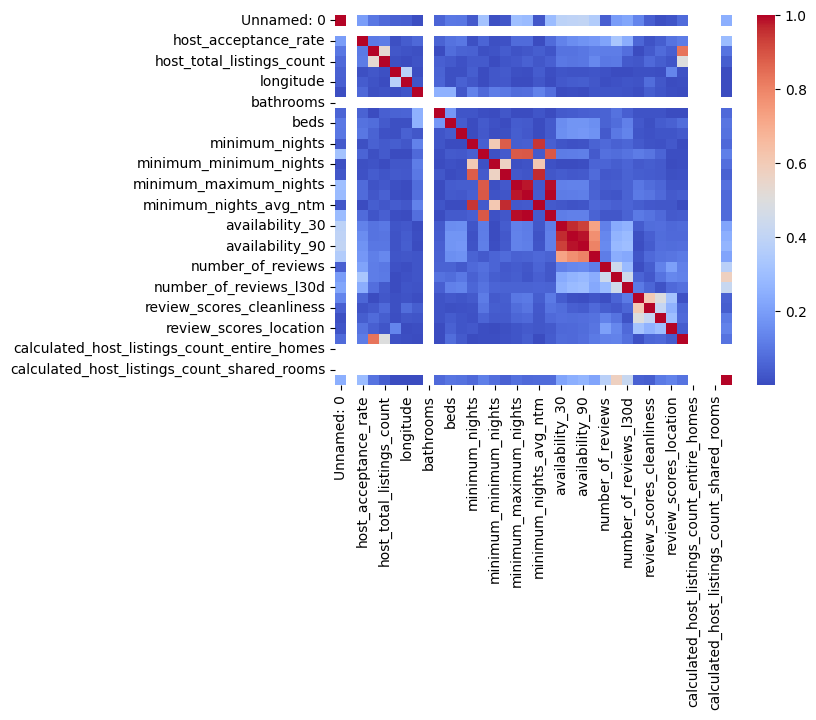

In [212]:
heat_map =sns.heatmap(corr_factors, cmap = 'coolwarm')
heat_map

In [ ]:
heat_map =sns.heatmap(corr_factors, cmap = 'Blues',annot=True,fmt='.1f')
heat_map

In [216]:
#Comprobar que la variable que yo pienso si es la más alta
cor_matrix = df3.corr()
cor_matrix['maximum_minimum_nights'].sort_values(ascending=False)

maximum_minimum_nights                           1.000000
minimum_nights_avg_ntm                           0.962020
minimum_nights                                   0.880790
minimum_minimum_nights                           0.568638
availability_365                                 0.071539
availability_30                                  0.038976
host_listings_count                              0.038969
availability_90                                  0.033053
availability_60                                  0.029128
Unnamed: 0                                       0.027240
host_total_listings_count                        0.023009
calculated_host_listings_count                   0.012124
review_scores_location                           0.009614
beds                                             0.000366
price                                           -0.008747
host_acceptance_rate                            -0.012091
maximum_maximum_nights                          -0.023571
maximum_nights

In [217]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vari_Dep = df3['maximum_minimum_nights']
Vari_Indep = df3 [['minimum_nights_avg_ntm']]

In [218]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [219]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vari_Indep,y=Vari_Dep)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['minimum_nights_avg_ntm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.048259]),
 'rank_': 1,
 'singular_': array([166.06864878]),
 'intercept_': np.float64(-0.003820790507100824)}

**Modelo matemático TODO df3 y = 1.048x (coef) -0.003820790507100824 (intercept)**

## DataFrame de Shared room

In [ ]:
df4 = df[(df['room_type']=='Shared room')]
df4

In [ ]:
#Eliminamos columnas tipo string
df4 = df4.select_dtypes(include=['float64','int64','float','int'])
df4

**Primeras variables: “host_acceptance_rate vs host_response_rate”**

In [ ]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='host_response_rate',color='brown',data=df4)

In [223]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep1 = df4['host_acceptance_rate']
Var_Indep1 = df4 [['host_response_rate']]

In [224]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [225]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep1,y=Var_Dep1)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(0.9884615384615386)}

**Modelo matemático y = 0x (coef) + 0.9884615384615386 (intercept)**

In [226]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Dete = model.score (X = Var_Indep1, y = Var_Dep1)
print(f'Coeficiente de determinación:',coef_Dete)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Corre = np.sqrt(coef_Dete)
print(f'Coeficiente de correlación:',coef_Corre)

Coeficiente de determinación: 0.0
Coeficiente de correlación: 0.0


**Segundas variables: “host_acceptance_rate vs price”**

In [ ]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='price',color='red',data=df4)

In [228]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep2 = df4['host_acceptance_rate']
Var_Indep2 = df4 [['price']]

In [229]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [230]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep2,y=Var_Dep2)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00130416]),
 'rank_': 1,
 'singular_': array([15.71497938]),
 'intercept_': np.float64(0.8839152932381764)}

**Modelo matemático y = 0.001x (coef) + 0.8839152932381764 (intercept)**

In [231]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Dete = model.score (X = Var_Indep2, y = Var_Dep2)
print(f'Coeficiente de determinación:',coef_Dete)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Corre = np.sqrt(coef_Dete)
print(f'Coeficiente de correlación:',coef_Corre)

Coeficiente de determinación: 0.004542115931477797
Coeficiente de correlación: 0.06739522187423821


**Terceras variables: “host_acceptance_rate vs number_of_reviews ”**

In [ ]:
from turtle import color
sns.scatterplot (x='host_acceptance_rate',y='number_of_reviews',color='pink',data=df4)

In [233]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep3 = df4['host_acceptance_rate']
Var_Indep3 = df4 [['number_of_reviews']]

In [234]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [235]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep3,y=Var_Dep3)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00030331]),
 'rank_': 1,
 'singular_': array([113.67386548]),
 'intercept_': np.float64(0.9909439732848714)}

**Modelo matemático y = -0.00x (coef) + 0.9909439732848714 (intercept)**

In [236]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coe_Deter = model.score (X = Var_Indep3, y = Var_Dep3)
print(f'Coeficiente de determinación:',coe_Deter)
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coe_Correl = np.sqrt(coe_Deter)
print(f'Coeficiente de correlación:',coe_Correl)

Coeficiente de determinación: 0.012854258930951601
Coeficiente de correlación: 0.11337662427040064


**Quartas variables: “review_scores_location vs review_scores_cleanliness”**

In [ ]:
from turtle import color
sns.scatterplot (x='review_scores_location',y='review_scores_cleanliness',color='green',data=df4)

In [238]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep4 = df4['review_scores_location']
Var_Indep4 = df4 [['review_scores_cleanliness']]

In [239]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [240]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep4,y=Var_Dep4)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.39999804]),
 'rank_': 1,
 'singular_': array([1.39988667]),
 'intercept_': np.float64(2.9694708523259745)}

**Modelo matemático y = 0.399x (coef) + 2.9694708523259745 (intercept)**

In [241]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Var_Indep4, y = Var_Dep4)
print(f'Coeficiente de determinación:',coef_Deter)
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.4426598032295268
Coeficiente de correlación: 0.6653268394026554


**Quintas variables: “availability_365 vs number_of_reviews”**

In [ ]:
from turtle import color
sns.scatterplot (x='availability_365',y='number_of_reviews',color='yellow',data=df4)

In [243]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep5 = df4['availability_365']
Var_Indep5 = df4 [['number_of_reviews']]

In [244]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [245]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep5,y=Var_Dep5)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.65423967]),
 'rank_': 1,
 'singular_': array([113.67386548]),
 'intercept_': np.float64(72.29529989751327)}

**Modelo matemático y = 2.654x (coef) + 72.29529989751327 (intercept)**

In [246]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Var_Indep5, y = Var_Dep5)
print(f'Coeficiente de determinación:',coef_Deter)
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.08282230995264261
Coeficiente de correlación: 0.2877886550103089


**Sextas variables: “reviews_per_month vs review_scores_communication”**

In [ ]:
#No tengo el de comunication entnces lo cambié por locatio
from turtle import color
sns.scatterplot (x='reviews_per_month',y='review_scores_location',color='purple',data=df4)

In [248]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep6 = df4['reviews_per_month']
Var_Indep6 = df4 [['review_scores_location']]

In [249]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [250]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep6,y=Var_Dep6)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.31594666]),
 'rank_': 1,
 'singular_': array([0.84161932]),
 'intercept_': np.float64(6.919661877457038)}

**Modelo matemático y = -1.315x (coef) + 6.919661877457038 (intercept)**

In [251]:
#Corroboramos cual es el coeficiente de DETERMINACIÓN de nuestro modelo
coef_Deter = model.score (X = Var_Indep6, y = Var_Dep6)
print(f'Coeficiente de determinación:',coef_Deter)

#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
print(f'Coeficiente de correlación:',coef_Correl)

Coeficiente de determinación: 0.1823676263049776
Coeficiente de correlación: 0.4270452274700861


**Modelo matemático con la mayor correlación del df4**

In [ ]:
#Correlacionar datos
corr_factors = df4.corr()
#Sacar absolutos
corr_factors = abs(corr_factors)
corr_factors

<Axes: >

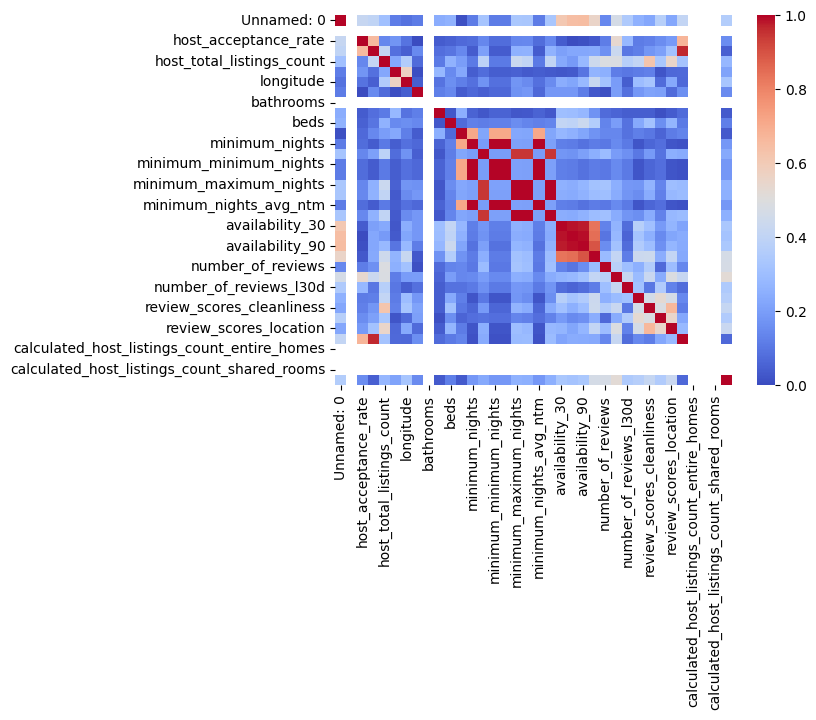

In [253]:
heat_map =sns.heatmap(corr_factors, cmap = 'coolwarm')
heat_map

In [254]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 81 to 9303
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     52 non-null     int64  
 1   host_response_rate                             52 non-null     float64
 2   host_acceptance_rate                           52 non-null     float64
 3   host_listings_count                            52 non-null     float64
 4   host_total_listings_count                      52 non-null     float64
 5   latitude                                       52 non-null     float64
 6   longitude                                      52 non-null     float64
 7   accommodates                                   52 non-null     float64
 8   bathrooms                                      52 non-null     float64
 9   bedrooms                                       52 non-null

In [ ]:
heat_map =sns.heatmap(corr_factors, cmap = 'Blues',annot=True,fmt='.1f')
heat_map

In [259]:
#Comprobar que la variable que yo pienso si es la más alta
cor_matrix = df4.corr()
cor_matrix['price'].sort_values(ascending=False)

price                                            1.000000
minimum_nights                                   0.712456
maximum_minimum_nights                           0.712456
minimum_minimum_nights                           0.712456
minimum_nights_avg_ntm                           0.712456
availability_30                                  0.274010
availability_60                                  0.256680
minimum_maximum_nights                           0.222692
availability_90                                  0.220876
maximum_nights                                   0.220405
maximum_nights_avg_ntm                           0.219344
maximum_maximum_nights                           0.219165
availability_365                                 0.168330
longitude                                        0.119073
review_scores_rating                             0.117885
review_scores_location                           0.109679
review_scores_cleanliness                        0.101531
host_acceptanc

In [261]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vari_Dep = df4['price']
Vari_Indep = df4 [['minimum_nights']]

In [262]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [263]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vari_Indep,y=Vari_Dep)
#Verificamos los coeficientes obtenidos para el modejo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['minimum_nights'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.97937022]),
 'rank_': 1,
 'singular_': array([11.43207364]),
 'intercept_': np.float64(78.61907004120073)}

**Modelo matemático TODO df4 y = 0.979x (coef) + 78.61907004120073 (intercept)**